In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
!pip install scikit-learn==1.6.0
from sklearn.model_selection import train_test_split

In [98]:
Ticker = 'CL=F'
gas = yf.download(Ticker, start = '2000-01-01', end = '2025-01-01', auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [99]:
oil = gas['Close':'Date'].pct_change()
oil.dropna()

Ticker,CL=F
Date,
2000-08-24,-0.013105
2000-08-25,0.013279
2000-08-28,0.025585
2000-08-29,-0.004563
2000-08-30,0.020782
...,...
2024-12-24,0.012421
2024-12-26,-0.006847
2024-12-27,0.014076


In [100]:
oil = oil.resample('YE').last()
oil.index = oil.index.year

In [101]:
oil

Ticker,CL=F
Date,
2000,0.036750
2001,-0.027927
2002,-0.005419
2003,-0.008234
2004,-0.004354
2005,0.011936
2006,0.008591
2007,-0.000208
2008,0.142711


In [102]:
Inflation = pd.read_csv('Inflation_2000-2025.csv', index_col=0)

In [103]:
Inflation = Inflation.drop(columns=Inflation.columns[1::])

In [104]:
Inflation

,Inflation
Year,
2000,0.034
2001,0.016
2002,0.024
2003,0.019
2004,0.033
2005,0.034
2006,0.025
2007,0.041
2008,0.001


In [105]:
Inflation.shape

(25, 1)

In [106]:
oil.shape

(25, 1)

In [107]:
gas_inf = Inflation.join(oil, how = 'inner')
gas_inf.head()

,Inflation,CL=F
Year,,
2000,0.034,0.036750
2001,0.016,-0.027927
2002,0.024,-0.005419
2003,0.019,-0.008234
2004,0.033,-0.004354


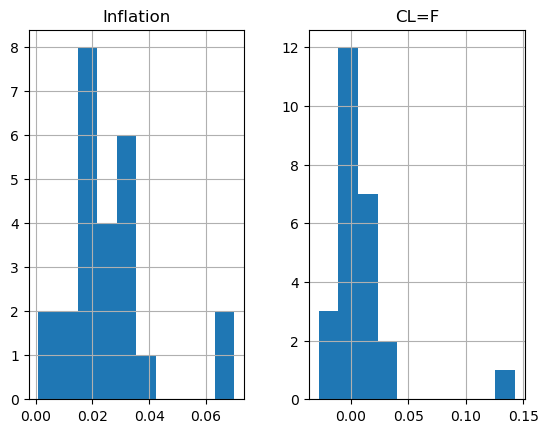

In [108]:
viz = gas_inf[['Inflation', 'CL=F']]
viz.hist()
plt.show()

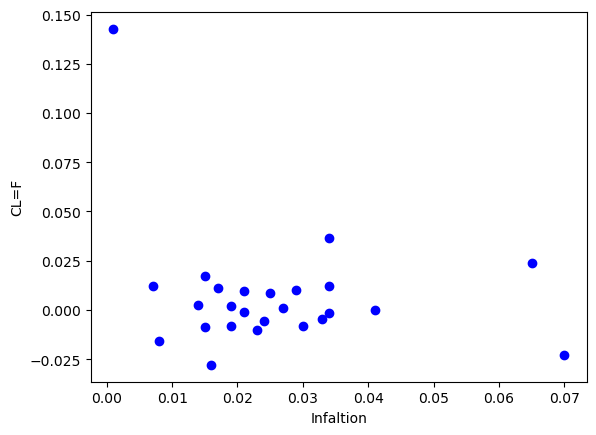

In [109]:
plt.scatter(gas_inf['Inflation'], gas_inf['CL=F'], color = 'blue')
plt.xlabel('Infaltion')
plt.ylabel('CL=F')
plt.show()

In [110]:
X = gas_inf['Inflation'].to_numpy()
y = gas_inf['CL=F'].to_numpy()

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 42)

In [112]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train)
print('Coefficients', reg.coef_[0])
print('Intercept:', reg.intercept_)

Coefficients -0.0585082043164801
Intercept: 0.004054303053178181


Text(0, 0.5, 'Oil')

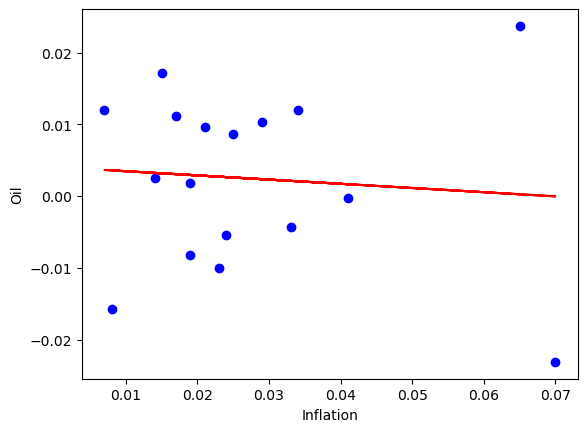

In [113]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, reg.coef_ * X_train + reg.intercept_, '-r')
plt.xlabel('Inflation')
plt.ylabel('Oil')

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test.reshape(-1,1))

print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean Squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2-Score: %.2f' % r2_score(y_test, y_pred))


Mean absolute error: 0.03
Mean Squared error: 0.00
Root mean squared error: 0.05
R2-Score: -0.06


Text(0, 0.5, 'Oil')

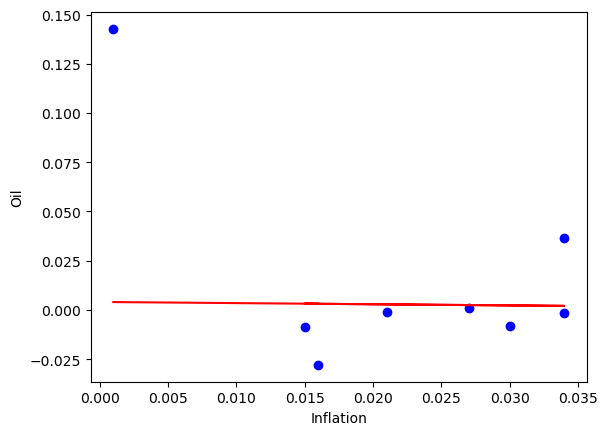

In [115]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, reg.coef_ * X_test + reg.intercept_, '-r')
plt.xlabel('Inflation')
plt.ylabel('Oil')